In [1]:
import os
import re
import glob
import pickle
import numpy as np
import pandas as pd
import pandas.io.common
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#### File Path and Variables
loc_path = r'/Users/raj2.gaurav/Desktop/' 
path = loc_path + r'/Git/Causal_Model/05. Training Data/'

In [3]:
df=pd.read_pickle( path + 'Pre_Processed_Causl_Data.pickle')

In [4]:
df.head()

,entity_cell_id,hour_of_day,entity_geohash,context_environment,avg_last_rrc_measurement_earfcn,num_distinct_imsi,mute_call_gap_indicator,num_mute_calls,avg_cqi,min_cqi,max_cqi,p05_cqi,p10_cqi,p50_cqi,p90_cqi,p95_cqi,sum_qci_1_ip_active_time_dl,avg_qci_1_ip_active_time_dl,min_qci_1_ip_active_time_dl,max_qci_1_ip_active_time_dl,p05_qci_1_ip_active_time_dl,p10_qci_1_ip_active_time_dl,p50_qci_1_ip_active_time_dl,p90_qci_1_ip_active_time_dl,p95_qci_1_ip_active_time_dl,sum_qci_9_ip_volume_dl,avg_qci_9_ip_volume_dl,min_qci_9_ip_volume_dl,max_qci_9_ip_volume_dl,p05_qci_9_ip_volume_dl,p10_qci_9_ip_volume_dl,p50_qci_9_ip_volume_dl,p90_qci_9_ip_volume_dl,p95_qci_9_ip_volume_dl,sum_qci_9_ip_active_time_dl,avg_qci_9_ip_active_time_dl,min_qci_9_ip_active_time_dl,max_qci_9_ip_active_time_dl,p05_qci_9_ip_active_time_dl,p10_qci_9_ip_active_time_dl,p50_qci_9_ip_active_time_dl,p90_qci_9_ip_active_time_dl,p95_qci_9_ip_active_time_dl,avg_rsrp,min_rsrp,max_rsrp,p05_rsrp,p10_rsrp,p50_rsrp,p90_rsrp,p95_rsrp,avg_rsrq,min_rsrq,max_rsrq,p05_rsrq,p10_rsrq,p50_rsrq,p90_rsrq,p95_rsrq,avg_pusch_sinr,min_pusch_sinr,max_pusch_sinr,p05_pusch_sinr,p10_pusch_sinr,p50_pusch_sinr,p90_pusch_sinr,p95_pusch_sinr,avg_uplink_interference,min_uplink_interference,max_uplink_interference,p05_uplink_interference,p10_uplink_interference,p50_uplink_interference,p90_uplink_interference,p95_uplink_interference,ta,min_ta,max_ta,p05_ta,p10_ta,p50_ta,p90_ta,p95_ta,avg_pucch_sinr,min_pucch_sinr,max_pucch_sinr,p05_pucch_sinr,p10_pucch_sinr,p50_pucch_sinr,p90_pucch_sinr,p95_pucch_sinr,session_duration,min_session_duration,avg_session_duration,max_session_duration,p05_session_duration,p10_session_duration,p50_session_duration,p90_session_duration,p95_session_duration,total_num_of_neighbors,num_of_neighbors,avg_intersite_distance,p05_intersite_distance,p10_intersite_distance,p50_intersite_distance,p90_intersite_distance,p95_intersite_distance,min_ta_isd_ratio,max_ta_isd_ratio,avg_ta_isd_ratio,p05_ta_isd_ratio,p10_ta_isd_ratio,p50_ta_isd_ratio,p90_ta_isd_ratio,p95_ta_isd_ratio,tot_erab_attempts,tot_erab_successes,tot_erab_failed_attempts,tot_erab_release_attempts,tot_erab_drops,tot_erab_normal_releases,tot_download_data_volume,tot_upload_data_volume,avg_start_timing_advance,context_environment_Outdoor,context_environment_Indoor,context_environment_Mobile,context_environment_Unknown,service_type_data_only,service_type_voice_and_data,service_type_unknown,final_disposition_outgoing_ho,final_disposition_redirection,final_disposition_dropped_connection,final_disposition_failed_attempt,final_disposition_normal_release,final_disposition_failed_reestablishment,final_disposition_unknown,establishment_cause_mo_data,establishment_cause_mt_access,establishment_cause_mo_signalling,establishment_cause_emergency,establishment_cause_high_priority_access,establishment_cause_unknown,handover_cause_desirable_radio_reason,handover_cause_time_crirical_ho,radio_type_we_e_utran,radio_type_5g_en_dc,last_ho_disposition_Success,last_ho_disposition_Prep_Failure,last_ho_disposition_Exec_Failure,last_ho_disposition_Handover_Canceled,qci_1_count,qci_2_count,qci_3_count,qci_4_count,qci_5_count,qci_6_count,qci_7_count,qci_8_count,qci_9_count,rsrp_bucket_1_count,rsrp_bucket_2_count,rsrp_bucket_3_count,rsrp_bucket_4_count,rsrp_bucket_5_count,rsrp_bucket_6_count,rsrq_bucket_1_count,rsrq_bucket_2_count,rsrq_bucket_3_count,rsrq_bucket_4_count,rsrq_bucket_5_count,rsrq_bucket_6_count,cqi_bucket_1_count,cqi_bucket_2_count,cqi_bucket_3_count,cqi_bucket_4_count,cqi_bucket_5_count,cqi_bucket_6_count,sinr_bucket_1_count,sinr_bucket_2_count,sinr_bucket_3_count,sinr_bucket_4_count,sinr_bucket_5_count,sinr_bucket_6_count,count_Price_lt_10k,count_Price_10k_to_20k,count_Price_20k_to_30k,count_Price_30k_to_40k,count_Price_40k_to_50k,count_Price_50k_to_60k,count_Price_gt_60k,num_of_records,pct_mute_call,last_rrc_measurement_earfcn_bucketed,fd_outgoing_ho_pct,fd_redirection_pct,fd_dropped_connection_pct,fd_failed_attempt_pct,fd_normal_r

In [5]:
df.isnull().sum()

entity_cell_id                              0
hour_of_day                                 0
entity_geohash                              0
context_environment                         0
avg_last_rrc_measurement_earfcn             0
num_distinct_imsi                           0
mute_call_gap_indicator                     0
num_mute_calls                              0
avg_cqi                                     0
min_cqi                                     0
max_cqi                                     0
p05_cqi                                     0
p10_cqi                                     0
p50_cqi                                     0
p90_cqi                                     0
p95_cqi                                     0
sum_qci_1_ip_active_time_dl                 0
avg_qci_1_ip_active_time_dl                 0
min_qci_1_ip_active_time_dl                 0
max_qci_1_ip_active_time_dl                 0
p05_qci_1_ip_active_time_dl                 0
p10_qci_1_ip_active_time_dl       

In [6]:
df['Target_Variable'].value_counts()

1    285676
0     57448
Name: Target_Variable, dtype: int64

In [7]:
df_minor=df[df['Target_Variable']==0]

In [8]:
df_major=df[df['Target_Variable']==1]

In [9]:
df_major.shape

(285676, 217)

In [10]:
df_sample=df_major.iloc[:100000]

In [11]:
df_sample.head()

,entity_cell_id,hour_of_day,entity_geohash,context_environment,avg_last_rrc_measurement_earfcn,num_distinct_imsi,mute_call_gap_indicator,num_mute_calls,avg_cqi,min_cqi,max_cqi,p05_cqi,p10_cqi,p50_cqi,p90_cqi,p95_cqi,sum_qci_1_ip_active_time_dl,avg_qci_1_ip_active_time_dl,min_qci_1_ip_active_time_dl,max_qci_1_ip_active_time_dl,p05_qci_1_ip_active_time_dl,p10_qci_1_ip_active_time_dl,p50_qci_1_ip_active_time_dl,p90_qci_1_ip_active_time_dl,p95_qci_1_ip_active_time_dl,sum_qci_9_ip_volume_dl,avg_qci_9_ip_volume_dl,min_qci_9_ip_volume_dl,max_qci_9_ip_volume_dl,p05_qci_9_ip_volume_dl,p10_qci_9_ip_volume_dl,p50_qci_9_ip_volume_dl,p90_qci_9_ip_volume_dl,p95_qci_9_ip_volume_dl,sum_qci_9_ip_active_time_dl,avg_qci_9_ip_active_time_dl,min_qci_9_ip_active_time_dl,max_qci_9_ip_active_time_dl,p05_qci_9_ip_active_time_dl,p10_qci_9_ip_active_time_dl,p50_qci_9_ip_active_time_dl,p90_qci_9_ip_active_time_dl,p95_qci_9_ip_active_time_dl,avg_rsrp,min_rsrp,max_rsrp,p05_rsrp,p10_rsrp,p50_rsrp,p90_rsrp,p95_rsrp,avg_rsrq,min_rsrq,max_rsrq,p05_rsrq,p10_rsrq,p50_rsrq,p90_rsrq,p95_rsrq,avg_pusch_sinr,min_pusch_sinr,max_pusch_sinr,p05_pusch_sinr,p10_pusch_sinr,p50_pusch_sinr,p90_pusch_sinr,p95_pusch_sinr,avg_uplink_interference,min_uplink_interference,max_uplink_interference,p05_uplink_interference,p10_uplink_interference,p50_uplink_interference,p90_uplink_interference,p95_uplink_interference,ta,min_ta,max_ta,p05_ta,p10_ta,p50_ta,p90_ta,p95_ta,avg_pucch_sinr,min_pucch_sinr,max_pucch_sinr,p05_pucch_sinr,p10_pucch_sinr,p50_pucch_sinr,p90_pucch_sinr,p95_pucch_sinr,session_duration,min_session_duration,avg_session_duration,max_session_duration,p05_session_duration,p10_session_duration,p50_session_duration,p90_session_duration,p95_session_duration,total_num_of_neighbors,num_of_neighbors,avg_intersite_distance,p05_intersite_distance,p10_intersite_distance,p50_intersite_distance,p90_intersite_distance,p95_intersite_distance,min_ta_isd_ratio,max_ta_isd_ratio,avg_ta_isd_ratio,p05_ta_isd_ratio,p10_ta_isd_ratio,p50_ta_isd_ratio,p90_ta_isd_ratio,p95_ta_isd_ratio,tot_erab_attempts,tot_erab_successes,tot_erab_failed_attempts,tot_erab_release_attempts,tot_erab_drops,tot_erab_normal_releases,tot_download_data_volume,tot_upload_data_volume,avg_start_timing_advance,context_environment_Outdoor,context_environment_Indoor,context_environment_Mobile,context_environment_Unknown,service_type_data_only,service_type_voice_and_data,service_type_unknown,final_disposition_outgoing_ho,final_disposition_redirection,final_disposition_dropped_connection,final_disposition_failed_attempt,final_disposition_normal_release,final_disposition_failed_reestablishment,final_disposition_unknown,establishment_cause_mo_data,establishment_cause_mt_access,establishment_cause_mo_signalling,establishment_cause_emergency,establishment_cause_high_priority_access,establishment_cause_unknown,handover_cause_desirable_radio_reason,handover_cause_time_crirical_ho,radio_type_we_e_utran,radio_type_5g_en_dc,last_ho_disposition_Success,last_ho_disposition_Prep_Failure,last_ho_disposition_Exec_Failure,last_ho_disposition_Handover_Canceled,qci_1_count,qci_2_count,qci_3_count,qci_4_count,qci_5_count,qci_6_count,qci_7_count,qci_8_count,qci_9_count,rsrp_bucket_1_count,rsrp_bucket_2_count,rsrp_bucket_3_count,rsrp_bucket_4_count,rsrp_bucket_5_count,rsrp_bucket_6_count,rsrq_bucket_1_count,rsrq_bucket_2_count,rsrq_bucket_3_count,rsrq_bucket_4_count,rsrq_bucket_5_count,rsrq_bucket_6_count,cqi_bucket_1_count,cqi_bucket_2_count,cqi_bucket_3_count,cqi_bucket_4_count,cqi_bucket_5_count,cqi_bucket_6_count,sinr_bucket_1_count,sinr_bucket_2_count,sinr_bucket_3_count,sinr_bucket_4_count,sinr_bucket_5_count,sinr_bucket_6_count,count_Price_lt_10k,count_Price_10k_to_20k,count_Price_20k_to_30k,count_Price_30k_to_40k,count_Price_40k_to_50k,count_Price_50k_to_60k,count_Price_gt_60k,num_of_records,pct_mute_call,last_rrc_measurement_earfcn_bucketed,fd_outgoing_ho_pct,fd_redirection_pct,fd_dropped_connection_pct,fd_failed_attempt_pct,fd_normal_r

In [13]:
df_scoring=df_sample.append(df_minor,ignore_index=True)

In [14]:
df_scoring.shape

(157448, 217)

In [15]:
df_scoring.head()

,entity_cell_id,hour_of_day,entity_geohash,context_environment,avg_last_rrc_measurement_earfcn,num_distinct_imsi,mute_call_gap_indicator,num_mute_calls,avg_cqi,min_cqi,max_cqi,p05_cqi,p10_cqi,p50_cqi,p90_cqi,p95_cqi,sum_qci_1_ip_active_time_dl,avg_qci_1_ip_active_time_dl,min_qci_1_ip_active_time_dl,max_qci_1_ip_active_time_dl,p05_qci_1_ip_active_time_dl,p10_qci_1_ip_active_time_dl,p50_qci_1_ip_active_time_dl,p90_qci_1_ip_active_time_dl,p95_qci_1_ip_active_time_dl,sum_qci_9_ip_volume_dl,avg_qci_9_ip_volume_dl,min_qci_9_ip_volume_dl,max_qci_9_ip_volume_dl,p05_qci_9_ip_volume_dl,p10_qci_9_ip_volume_dl,p50_qci_9_ip_volume_dl,p90_qci_9_ip_volume_dl,p95_qci_9_ip_volume_dl,sum_qci_9_ip_active_time_dl,avg_qci_9_ip_active_time_dl,min_qci_9_ip_active_time_dl,max_qci_9_ip_active_time_dl,p05_qci_9_ip_active_time_dl,p10_qci_9_ip_active_time_dl,p50_qci_9_ip_active_time_dl,p90_qci_9_ip_active_time_dl,p95_qci_9_ip_active_time_dl,avg_rsrp,min_rsrp,max_rsrp,p05_rsrp,p10_rsrp,p50_rsrp,p90_rsrp,p95_rsrp,avg_rsrq,min_rsrq,max_rsrq,p05_rsrq,p10_rsrq,p50_rsrq,p90_rsrq,p95_rsrq,avg_pusch_sinr,min_pusch_sinr,max_pusch_sinr,p05_pusch_sinr,p10_pusch_sinr,p50_pusch_sinr,p90_pusch_sinr,p95_pusch_sinr,avg_uplink_interference,min_uplink_interference,max_uplink_interference,p05_uplink_interference,p10_uplink_interference,p50_uplink_interference,p90_uplink_interference,p95_uplink_interference,ta,min_ta,max_ta,p05_ta,p10_ta,p50_ta,p90_ta,p95_ta,avg_pucch_sinr,min_pucch_sinr,max_pucch_sinr,p05_pucch_sinr,p10_pucch_sinr,p50_pucch_sinr,p90_pucch_sinr,p95_pucch_sinr,session_duration,min_session_duration,avg_session_duration,max_session_duration,p05_session_duration,p10_session_duration,p50_session_duration,p90_session_duration,p95_session_duration,total_num_of_neighbors,num_of_neighbors,avg_intersite_distance,p05_intersite_distance,p10_intersite_distance,p50_intersite_distance,p90_intersite_distance,p95_intersite_distance,min_ta_isd_ratio,max_ta_isd_ratio,avg_ta_isd_ratio,p05_ta_isd_ratio,p10_ta_isd_ratio,p50_ta_isd_ratio,p90_ta_isd_ratio,p95_ta_isd_ratio,tot_erab_attempts,tot_erab_successes,tot_erab_failed_attempts,tot_erab_release_attempts,tot_erab_drops,tot_erab_normal_releases,tot_download_data_volume,tot_upload_data_volume,avg_start_timing_advance,context_environment_Outdoor,context_environment_Indoor,context_environment_Mobile,context_environment_Unknown,service_type_data_only,service_type_voice_and_data,service_type_unknown,final_disposition_outgoing_ho,final_disposition_redirection,final_disposition_dropped_connection,final_disposition_failed_attempt,final_disposition_normal_release,final_disposition_failed_reestablishment,final_disposition_unknown,establishment_cause_mo_data,establishment_cause_mt_access,establishment_cause_mo_signalling,establishment_cause_emergency,establishment_cause_high_priority_access,establishment_cause_unknown,handover_cause_desirable_radio_reason,handover_cause_time_crirical_ho,radio_type_we_e_utran,radio_type_5g_en_dc,last_ho_disposition_Success,last_ho_disposition_Prep_Failure,last_ho_disposition_Exec_Failure,last_ho_disposition_Handover_Canceled,qci_1_count,qci_2_count,qci_3_count,qci_4_count,qci_5_count,qci_6_count,qci_7_count,qci_8_count,qci_9_count,rsrp_bucket_1_count,rsrp_bucket_2_count,rsrp_bucket_3_count,rsrp_bucket_4_count,rsrp_bucket_5_count,rsrp_bucket_6_count,rsrq_bucket_1_count,rsrq_bucket_2_count,rsrq_bucket_3_count,rsrq_bucket_4_count,rsrq_bucket_5_count,rsrq_bucket_6_count,cqi_bucket_1_count,cqi_bucket_2_count,cqi_bucket_3_count,cqi_bucket_4_count,cqi_bucket_5_count,cqi_bucket_6_count,sinr_bucket_1_count,sinr_bucket_2_count,sinr_bucket_3_count,sinr_bucket_4_count,sinr_bucket_5_count,sinr_bucket_6_count,count_Price_lt_10k,count_Price_10k_to_20k,count_Price_20k_to_30k,count_Price_30k_to_40k,count_Price_40k_to_50k,count_Price_50k_to_60k,count_Price_gt_60k,num_of_records,pct_mute_call,last_rrc_measurement_earfcn_bucketed,fd_outgoing_ho_pct,fd_redirection_pct,fd_dropped_connection_pct,fd_failed_attempt_pct,fd_normal_r

In [17]:
df_scoring.to_pickle('Scoring_dataset.pickle')

In [8]:
df.drop('qci_9_tp',axis=1,inplace=True)

In [34]:
df_ml=df.drop(['entity_cell_id','entity_geohash','data_date','last_rrc_measurement_earfcn_bucketed','p95_pucch_sinr'],axis=1)

In [38]:
X = df_ml.loc[:, df_ml.columns != "Target_Variable"]
y = df_ml.loc[:, df_ml.columns == "Target_Variable"]

In [11]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import statsmodels.api as sm

In [12]:
def data_preprocess(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

    scaler.fit(X_train)

    # Now apply the transformations to the data:
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    return(train_scaled, test_scaled, y_train, y_test)

In [13]:
def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x, y)
    return(logreg)

In [35]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

In [36]:
encoding_lst=['context_environment']

In [37]:
for i in range(0, len(encoding_lst)):
    df_ml[f'{encoding_lst[i]}'] = pd.Categorical(df_ml[f'{encoding_lst[i]}'])
    dummies = pd.get_dummies(df_ml[f'{encoding_lst[i]}'], prefix = f'{encoding_lst[i]}_encoded')
    df_ml.drop([f'{encoding_lst[i]}'], axis=1, inplace=True)
    df_ml = pd.concat([df_ml, dummies], axis=1)

In [33]:
X.dtypes

hour_of_day                                         int64
avg_last_rrc_measurement_earfcn                   float64
num_distinct_imsi                                   int64
mute_call_gap_indicator                             int64
num_mute_calls                                      int64
avg_cqi                                           float64
min_cqi                                             int64
max_cqi                                             int64
p05_cqi                                           float64
p10_cqi                                           float64
p50_cqi                                           float64
p90_cqi                                           float64
p95_cqi                                           float64
sum_qci_1_ip_active_time_dl                       float64
avg_qci_1_ip_active_time_dl                       float64
min_qci_1_ip_active_time_dl                       float64
max_qci_1_ip_active_time_dl                       float64
p05_qci_1_ip_a

In [39]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

In [40]:
logreg_result = logistic_regression(X_train_scaled, y_train)

In [41]:
print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.940
Test set score: 0.939


In [43]:
# While the previous model implemented was good in predicting the Target variable on a test set, 
# we did not interpret anything about the individual features - which variable(s) influence the Target variable more.

logit_model = sm.Logit(y_train, X_train_scaled)
result = logit_model.fit(method='bfgs')
print(result.summary2())

         Current function value: 0.631935
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/Users/raj2.gaurav/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/raj2.gaurav/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          Results: Logit
Model:              Logit            Pseudo R-squared: -0.400     
Dependent Variable: y                AIC:              303919.9602
Date:               2023-03-23 13:35 BIC:              305769.2322
No. Observations:   240186           Log-Likelihood:   -1.5178e+05
Df Model:           177              LL-Null:          -1.0838e+05
Df Residuals:       240008           LLR p-value:      1.0000     
Converged:          0.0000           Scale:            1.0000     
----------------------------------------------------------------------
           Coef.      Std.Err.      z      P>|z|     [0.025     0.975]
----------------------------------------------------------------------
x1         0.0110          nan     nan       nan        nan        nan
x2         0.0226          nan     nan       nan        nan        nan
x3        -0.0312          nan     nan       nan        nan        nan
x4        -0.0088          nan     nan       nan        nan     

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# assigning the model predicted values to y_pred
y_pred = logreg_result.predict(X_test_scaled)


# assigning the string Normal and Abnormal to the 0 and 1 values respectively. This is useful in plotting 
# the confusion matrix
y_pred_string = y_pred.astype(str)
y_pred_string[np.where(y_pred_string == '0')] = 'AbNormal'
y_pred_string[np.where(y_pred_string == '1')] = 'Normal'

y_test_string = y_test.astype(str)
y_test_string[np.where(y_test_string == '0')] = 'AbNormal'
y_test_string[np.where(y_test_string == '1')] = 'Normal'

In [51]:
y_test_string

array(['Normal', 'Abnormal', 'Abnormal', ..., 'Normal', 'Normal',
       'Abnormal'], dtype='<U21')

In [56]:
y_pred

array([1, 1, 1, ..., 0, 0, 1])

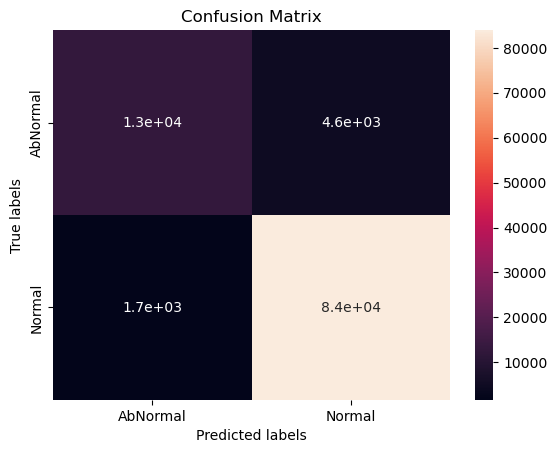

In [59]:
# Gauging model accuracy

from sklearn.metrics import confusion_matrix
ax= plt.subplot()
classes = ['AbNormal','Normal']
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['AbNormal', 'Normal']); ax.yaxis.set_ticklabels(['AbNormal', 'Normal']);
plt.show()

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[12721  4597]
 [ 1680 83940]]


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80     17318
           1       0.95      0.98      0.96     85620

    accuracy                           0.94    102938
   macro avg       0.92      0.86      0.88    102938
weighted avg       0.94      0.94      0.94    102938



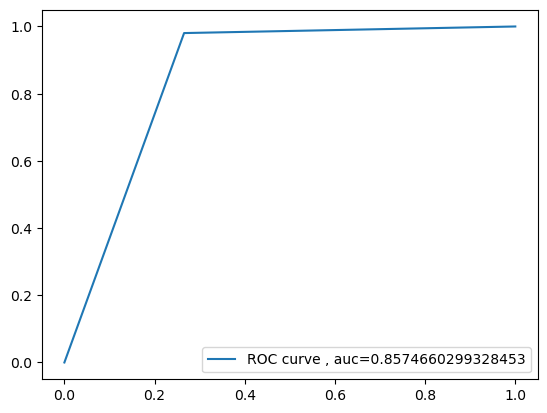

In [60]:
from sklearn import metrics
fpr, tpr, threshholds = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="ROC curve , auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test

In [65]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_scaled, y_train)

print_score(tree_clf, X_train_scaled, y_train,X_test_scaled,y_test, train=True)
print_score(tree_clf, X_train_scaled, y_train,X_test_scaled,y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0         1  accuracy  macro avg  weighted avg
precision      1.0       1.0       1.0        1.0           1.0
recall         1.0       1.0       1.0        1.0           1.0
f1-score       1.0       1.0       1.0        1.0           1.0
support    40130.0  200056.0       1.0   240186.0      240186.0
_______________________________________________
Confusion Matrix: 
 [[ 40130      0]
 [     0 200056]]

Test Result:
Accuracy Score: 98.69%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.959379      0.992473  0.986885       0.975926       0.986905
recall         0.962813      0.991754  0.986885       0.977284       0.986885
f1-score       0.961093      0.992113  0.986885       0.976603       0.986895
support    17318.000000  85620.000000  0.986885 

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1,10))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="recall", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(X_train_scaled, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train_scaled, y_train)
print_score(tree_clf, X_train_scaled, y_train,X_test_scaled,y_test, train=True)
print_score(tree_clf, X_train_scaled, y_train,X_test_scaled,y_test, train=False)

Fitting 5 folds for each of 2052 candidates, totalling 10260 fits
Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 83.29%
_______________________________________________
CLASSIFICATION REPORT:
                 0              1  accuracy      macro avg   weighted avg
precision      0.0       0.832921  0.832921       0.416461       0.693758
recall         0.0       1.000000  0.832921       0.500000       0.832921
f1-score       0.0       0.908846  0.832921       0.454423       0.756997
support    40130.0  200056.000000  0.832921  240186.000000  240186.000000
_______________________________________________
Confusion Matrix: 
 [[     0  40130]
 [     0 200056]]

Test Result:
Accuracy Score: 83.18%
_______________________________________________
CLASSIFICATION REPORT:
                 0             1  accuracy      macro avg   weighted avg
precision      0.0      0.831763  0.831763       0

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=5)
rf_clf.fit(X_train_scaled, y_train)

print_score(rf_clf, X_train_scaled, y_train,X_test_scaled,y_test, train=True)
print_score(rf_clf, X_train_scaled, y_train,X_test_scaled,y_test, train=False)

Train Result:
Accuracy Score: 99.70%
_______________________________________________
CLASSIFICATION REPORT:
                      0              1  accuracy      macro avg   weighted avg
precision      0.993441       0.997768  0.997048       0.995604       0.997045
recall         0.988861       0.998690  0.997048       0.993776       0.997048
f1-score       0.991146       0.998229  0.997048       0.994687       0.997045
support    40130.000000  200056.000000  0.997048  240186.000000  240186.000000
_______________________________________________
Confusion Matrix: 
 [[ 39683    447]
 [   262 199794]]

Test Result:
Accuracy Score: 96.73%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.917725      0.976901  0.967301       0.947313       0.966945
recall         0.884975      0.983952  0.967301       0.934464       0.967301
f1-score       0.901052      0.980414  0.967301     

In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [72]:
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train_scaled, y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test_scaled))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
#print(classification_report(y_test, ada.predict(X_test)))
#print(classification_report(y_train, ada.predict(X_train)))

print_score(ada, X_train_scaled, y_train,X_test_scaled,y_test, train=True)
print_score(ada, X_train_scaled, y_train,X_test_scaled,y_test, train=False)



 ---AdaBoost Model---
AdaBoost AUC = 0.84
Train Result:
Accuracy Score: 94.26%
_______________________________________________
CLASSIFICATION REPORT:
                      0              1  accuracy      macro avg   weighted avg
precision      0.944788       0.942291  0.942599       0.943539       0.942708
recall         0.697184       0.991827  0.942599       0.844506       0.942599
f1-score       0.802317       0.966425  0.942599       0.884371       0.939006
support    40130.000000  200056.000000  0.942599  240186.000000  240186.000000
_______________________________________________
Confusion Matrix: 
 [[ 27978  12152]
 [  1635 198421]]

Test Result:
Accuracy Score: 94.13%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.940070      0.941513  0.941334       0.940792       0.941270
recall         0.695635      0.991030  0.941334       0.843332       0.941334
f1-score

In [ ]:
## Upampling and DownSampling

In [73]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_ml[df_ml.Target_Variable==0]
df_minority = df_ml[df_ml.Target_Variable==1]

print(df_ml.Target_Variable.count())
print("-----------")
print(df_ml.Target_Variable.count())
print("-----------")
print(df_ml.Target_Variable.value_counts())

343124
-----------
343124
-----------
1    285676
0     57448
Name: Target_Variable, dtype: int64


In [ ]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=853,    # to match majority class
                                 random_state=587) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.Target_Variable.value_counts()

In [ ]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=176,     # to match minority class
                                 random_state=24) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.Attrition.value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=587)
X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())
print(y_SMOTE.value_counts())

In [ ]:
#### Model Saving

In [78]:
import joblib
joblib.dump(logreg_result,'LR_model_dataset.obj')
# joblib.dump(tree_clf,'DT_model_dataset.obj')
# joblib.dump(rf_clf,'RF_model_dataset.obj')
# joblib.dump(ada,'ADA_model_dataset.obj')




['LR_model_dataset.obj']